In [44]:
import pandas  as pd 
import geopandas as gpd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from shapely.geometry import Point


In [2]:
persona = pd.read_csv("datos/accidentes_actualizados/nuevo_acumulado_ht_personas_lesionadas_o_fallecidas_por_tipo_persona_2023_12.csv")
persona = persona.sort_values(by="fecha_evento")
#persona["fecha_evento"] = pd.to_datetime(persona.fecha_evento.copy())
persona["ANIO_EVENTO"]=persona.fecha_evento.apply(lambda x : x.year)
persona["MES_EVENTO"]=persona.fecha_evento.apply(lambda x : x.month)
persona_ciclistas = persona[persona.tipo_persona=="Ciclista"].reset_index(drop=True)
persona_ciclistas["fecha_evento"] = pd.to_datetime(persona_ciclistas.fecha_evento.copy())

In [11]:
persona["fecha_evento"].min()

Timestamp('2020-01-01 00:00:00')

In [14]:
hechos = pd.read_csv("/home/daniel/personal/bicicletas/analisis/datos/accidentes_actualizados/nuevo_acumulado_hechos_de_transito_2023_12.csv",low_memory =False) 
hechos["fecha_evento"] = pd.to_datetime(hechos.fecha_evento.copy())
hechos = hechos [hechos.fecha_evento >=pd.to_datetime("2020-01-01")]

In [16]:
hechos["fecha_evento"].max()

Timestamp('2023-12-31 00:00:00')

In [18]:
hechos.shape

(99037, 26)

In [24]:
persona.head().T

,15385,3581,3580,3579,3578
fecha_evento,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
hora_evento,13:55:00,00:46:00,22:36:00,17:40:00,16:09:00
tipo_evento,ATROPELLADO,DERRAPADO,CHOQUE,CHOQUE,CHOQUE
fecha_captura,2020-01-02,2020-01-02,2020-01-02,2020-01-02,2020-01-02
folio,2347758,2345003,2349312,2348407,2348159
latitud,19.358231,19.459689,19.407956,19.536381,19.343153
longitud,-99.08568,-99.206784,-99.119949,-99.142168,-99.040558
punto_1,EJE 5 OTE,CALZ SAN BARTOLO NAUCALPAN,NICOLAS BRAVO,AV EMILIANO ZAPATA,EJE 8 SUR
punto_2,AV LUIS HIDALGO MONROY,SANCTORUM,RIO FRIO,CALLE 11,CUITLAHUAC
colonia,BA SAN MIGUEL,ARGENTINA PTE,MAGDALENA MIXIHUCA,EL ARBOLILLO,STA CRUZ MEYEHUALCO


In [27]:
persona[["tipo_evento","tipo_persona","total"]].groupby(["tipo_evento","tipo_persona"]).sum().reset_index().pivot("tipo_evento","tipo_persona","total")

tipo_persona,Ciclista,Conductora,Motociclista,Pasajera,Peatón
tipo_evento,,,,,
ATROPELLADO,75.0,28.0,256.0,78.0,16087.0
CAIDA DE CICLISTA,2853.0,NaN,NaN,53.0,4.0
CAIDA DE PASAJERO,2.0,NaN,3.0,1575.0,2.0
CHOQUE,5226.0,17442.0,32614.0,17222.0,344.0
DERRAPADO,1.0,8.0,18163.0,2646.0,26.0
VOLCADURA,1.0,1506.0,3.0,738.0,11.0


In [31]:
persona[(persona.tipo_persona=="Ciclista")&(persona.tipo_evento=="VOLCADURA")]

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,tipo_persona,condicion_persona,total,ANIO_EVENTO,MES_EVENTO
3346,2020-11-15,23:58:00,VOLCADURA,2020-11-26,C5/201116/00015,19.283872,-99.128797,ANILLO PERIFERICO,RINCON DE LAS ROSAS,SAN BARTOLO EL CHICO,...,VAC ANULAR,P-O,Domingo,BAJA,911 CDMX,Ciclista,lesionada,1,2020,11


In [33]:
persona

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,tipo_persona,condicion_persona,total,ANIO_EVENTO,MES_EVENTO
15385,2020-01-01,13:55:00,ATROPELLADO,2020-01-02,2347758,19.358231,-99.085680,EJE 5 OTE,AV LUIS HIDALGO MONROY,BA SAN MIGUEL,...,EJE VIAL,NP-SO,Miércoles,BAJA,PM,Peatón,lesionada,1,2020,1
3581,2020-01-01,00:46:00,DERRAPADO,2020-01-02,2345003,19.459689,-99.206784,CALZ SAN BARTOLO NAUCALPAN,SANCTORUM,ARGENTINA PTE,...,VIA PRIMARIA,N-S,Miércoles,MEDIA,PM,Pasajera,lesionada,1,2020,1
3580,2020-01-01,22:36:00,CHOQUE,2020-01-02,2349312,19.407956,-99.119949,NICOLAS BRAVO,RIO FRIO,MAGDALENA MIXIHUCA,...,VIA SECUNDARIA,SP-NO,Miércoles,BAJA,PM,Motociclista,lesionada,1,2020,1
3579,2020-01-01,17:40:00,CHOQUE,2020-01-02,2348407,19.536381,-99.142168,AV EMILIANO ZAPATA,CALLE 11,EL ARBOLILLO,...,VIA PRIMARIA,N-S,Miércoles,BAJA,PM,Motociclista,lesionada,2,2020,1
3578,2020-01-01,16:09:00,CHOQUE,2020-01-02,2348159,19.343153,-99.040558,EJE 8 SUR,CUITLAHUAC,STA CRUZ MEYEHUALCO,...,EJE VIAL,P-O,Miércoles,BAJA,PM,Conductora,lesionada,2,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107738,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02497,19.445810,-99.149810,EJE 1 NTE,JUAN ALDAMA,BUENAVISTA,...,EJE VIAL,O-P,Domingo,BAJA,LLAMADA DEL 911,Ciclista,lesionada,1,2023,12
107737,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02287,19.295698,-99.184704,AV DE LOS INSURGENTES SUR,AV SAN FERNANDO,PEÑA POBRE,...,VIA PRIMARIA,NO-SP,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12
107735,2023-12-31,NaN,CHOQUE,2024-02-09,C2O/20231231/00063,19.357763,-99.093694,EJE 8 SUR,ENRIQUE CORONA M,SAN LUCAS,...,EJE VIAL,NO-SP,Domingo,BAJA,OTROS,Conductora,lesionada,1,2023,12
107754,2023-12-31,NaN,DERRAPADO,2024-02-09,C5/20231231/02880,19.460520,-99.080546,AV JOSE LORETO FABELA,EJE 4 NTE,SAN JUAN DE ARAGON IV SECC,...,VIA PRIMARIA,S-N,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12


In [34]:
persona [persona.hora_evento.isna()]

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,tipo_persona,condicion_persona,total,ANIO_EVENTO,MES_EVENTO
10871,2020-02-19,NaN,CHOQUE,2020-03-03,C5/200219/068323,19.440559,-99.190890,AV RIO SAN JOAQUIN,BLVRD MIGUEL DE CERVANTES SAAVEDRA,GRANADA,...,VIA PRIMARIA,N-S,Miércoles,MEDIA,911 CDMX,Motociclista,lesionada,1,2020,2
6513,2020-04-16,NaN,ATROPELLADO,2020-04-22,IZ/200416/05999,19.340527,-99.114234,CANAL NACIONAL,7A CDA CANAL NACIONAL,SAN ANTONIO CULHUACAN,...,VIA PRIMARIA,N-S,Jueves,BAJA,BOTON DE AUXILIO,Peatón,lesionada,1,2020,4
247,2020-04-27,NaN,ATROPELLADO,2020-04-29,INTERNET,19.345998,-98.981825,AUT FED MEXICO PUEBLA,EJE 6 SUR,AMPL EMILIANO ZAPATA,...,ACCESO CARRETERO,P-O,Lunes,ALTA,REDES,Peatón,fallecida,1,2020,4
59220,2022-07-04,NaN,ATROPELLADO,NaN,SIN FOLIO,19.410249,-99.080009,CALZ GRAL IGNACIO ZARAGOZA,CALLE 77,PUEBLA,...,VIA PRIMARIA,P-O,Lunes,ALTA,PM,Peatón,fallecida,1,2022,7
102418,2023-11-01,NaN,CHOQUE,NaN,C5/20231101/04848,19.389890,-99.061490,SUR 20,NOGAL,AGRICOLA ORIENTAL,...,VIA SECUNDARIA,P-O,Miércoles,BAJA,LLAMADA DEL 911,Pasajera,lesionada,1,2023,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107738,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02497,19.445810,-99.149810,EJE 1 NTE,JUAN ALDAMA,BUENAVISTA,...,EJE VIAL,O-P,Domingo,BAJA,LLAMADA DEL 911,Ciclista,lesionada,1,2023,12
107737,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02287,19.295698,-99.184704,AV DE LOS INSURGENTES SUR,AV SAN FERNANDO,PEÑA POBRE,...,VIA PRIMARIA,NO-SP,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12
107735,2023-12-31,NaN,CHOQUE,2024-02-09,C2O/20231231/00063,19.357763,-99.093694,EJE 8 SUR,ENRIQUE CORONA M,SAN LUCAS,...,EJE VIAL,NO-SP,Domingo,BAJA,OTROS,Conductora,lesionada,1,2023,12
107754,2023-12-31,NaN,DERRAPADO,2024-02-09,C5/20231231/02880,19.460520,-99.080546,AV JOSE LORETO FABELA,EJE 4 NTE,SAN JUAN DE ARAGON IV SECC,...,VIA PRIMARIA,S-N,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12


In [39]:
persona.head().T

,15385,3581,3580,3579,3578
fecha_evento,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
hora_evento,13:55:00,00:46:00,22:36:00,17:40:00,16:09:00
tipo_evento,ATROPELLADO,DERRAPADO,CHOQUE,CHOQUE,CHOQUE
fecha_captura,2020-01-02,2020-01-02,2020-01-02,2020-01-02,2020-01-02
folio,2347758,2345003,2349312,2348407,2348159
latitud,19.358231,19.459689,19.407956,19.536381,19.343153
longitud,-99.08568,-99.206784,-99.119949,-99.142168,-99.040558
punto_1,EJE 5 OTE,CALZ SAN BARTOLO NAUCALPAN,NICOLAS BRAVO,AV EMILIANO ZAPATA,EJE 8 SUR
punto_2,AV LUIS HIDALGO MONROY,SANCTORUM,RIO FRIO,CALLE 11,CUITLAHUAC
colonia,BA SAN MIGUEL,ARGENTINA PTE,MAGDALENA MIXIHUCA,EL ARBOLILLO,STA CRUZ MEYEHUALCO


In [87]:
persona = pd.read_csv("datos/accidentes_actualizados/nuevo_acumulado_ht_personas_lesionadas_o_fallecidas_por_tipo_persona_2023_12.csv")
persona = persona.sort_values(by="fecha_evento").reset_index(drop=True)

In [88]:
p = persona[['fecha_evento', 'hora_evento', 'tipo_evento',
       'latitud', 'longitud', 'alcaldia',
       'dia','tipo_persona',
       'condicion_persona', 'total']]
p.longitud = p.longitud.apply(lambda x : -x if x>90 else x)
p = p[p.longitud<0]

p.latitud = p.latitud.apply(lambda x : abs(x) if x<0 else x)
p = p[p.latitud.notna()]

In [89]:
p

,fecha_evento,hora_evento,tipo_evento,latitud,longitud,alcaldia,dia,tipo_persona,condicion_persona,total
0,2020-01-01,13:55:00,ATROPELLADO,19.358231,-99.085680,IZTAPALAPA,Miércoles,Peatón,lesionada,1
1,2020-01-01,00:46:00,DERRAPADO,19.459689,-99.206784,MIGUEL HIDALGO,Miércoles,Pasajera,lesionada,1
2,2020-01-01,22:36:00,CHOQUE,19.407956,-99.119949,VENUSTIANO CARRANZA,Miércoles,Motociclista,lesionada,1
3,2020-01-01,17:40:00,CHOQUE,19.536381,-99.142168,GUSTAVO A MADERO,Miércoles,Motociclista,lesionada,2
4,2020-01-01,16:09:00,CHOQUE,19.343153,-99.040558,IZTAPALAPA,Miércoles,Conductora,lesionada,2
...,...,...,...,...,...,...,...,...,...,...
107790,2023-12-31,NaN,CHOQUE,19.445810,-99.149810,CUAUHTEMOC,Domingo,Ciclista,lesionada,1
107791,2023-12-31,NaN,CHOQUE,19.295698,-99.184704,TLALPAN,Domingo,Motociclista,lesionada,1
107792,2023-12-31,NaN,CHOQUE,19.357763,-99.093694,IZTAPALAPA,Domingo,Conductora,lesionada,1
107793,2023-12-31,NaN,DERRAPADO,19.460520,-99.080546,GUSTAVO A MADERO,Domingo,Motociclista,lesionada,1


In [90]:
geometry = [Point(xy) for xy in zip(p['longitud'], p['latitud'])]


In [91]:
geopersonas = gpd.GeoDataFrame(p.drop(["longitud","latitud"],axis=1),geometry=geometry)

In [92]:
geopersonas.to_file("datos_limpios/personas.geojson")

In [80]:
geopersonas

,fecha_evento,hora_evento,tipo_evento,latitud,longitud,alcaldia,unidad_a_cargo,tipo_de_interseccion,interseccion_semaforizada,dia,tipo_persona,condicion_persona,total,geometry
15385,2020-01-01,13:55:00,ATROPELLADO,19.358231,-99.085680,IZTAPALAPA,MX859M8,CRUZ,SI,Miércoles,Peatón,lesionada,1,POINT (-99.08568 19.35823)
3581,2020-01-01,00:46:00,DERRAPADO,19.459689,-99.206784,MIGUEL HIDALGO,MX631P2,T,NO,Miércoles,Pasajera,lesionada,1,POINT (-99.20678 19.45969)
3580,2020-01-01,22:36:00,CHOQUE,19.407956,-99.119949,VENUSTIANO CARRANZA,MX930N1,GLORIETA,NO,Miércoles,Motociclista,lesionada,1,POINT (-99.11995 19.40796)
3579,2020-01-01,17:40:00,CHOQUE,19.536381,-99.142168,GUSTAVO A MADERO,MX540N1,T,NO,Miércoles,Motociclista,lesionada,2,POINT (-99.14217 19.53638)
3578,2020-01-01,16:09:00,CHOQUE,19.343153,-99.040558,IZTAPALAPA,MX003T4,CRUZ,SI,Miércoles,Conductora,lesionada,2,POINT (-99.04056 19.34315)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107738,2023-12-31,NaN,CHOQUE,19.445810,-99.149810,CUAUHTEMOC,MX029K2,RECTA,NO,Domingo,Ciclista,lesionada,1,POINT (-99.14981 19.44581)
107737,2023-12-31,NaN,CHOQUE,19.295698,-99.184704,TLALPAN,MX470M4,RAMAS MULTIPLES,SI,Domingo,Motociclista,lesionada,1,POINT (-99.18470 19.29570)
107735,2023-12-31,NaN,CHOQUE,19.357763,-99.093694,IZTAPALAPA,MX64M4,T,SI,Domingo,Conductora,lesionada,1,POINT (-99.09369 19.35776)
107754,2023-12-31,NaN,DERRAPADO,19.460520,-99.080546,GUSTAVO A MADERO,MX369D1,RECTA,NO,Domingo,Motociclista,lesionada,1,POINT (-99.08055 19.46052)


In [4]:
vehiculos = pd.read_csv("/home/daniel/personal/bicicletas/analisis/datos/accidentes_actualizados/nuevo_acumulado_ht_vehiculos_incolucrados_2023_12.csv",low_memory =False) 

In [5]:

persona[persona.tipo_persona=="Conductora"].fecha_evento.apply(lambda x : x.day_name()).value_counts()

Saturday     3137
Sunday       3087
Friday       2413
Thursday     2063
Monday       2049
Wednesday    2006
Tuesday      1944
Name: fecha_evento, dtype: int64

In [210]:
persona[persona.tipo_persona=="Motociclista"].fecha_evento.apply(lambda x : x.day_name()).value_counts()

Saturday     7956
Friday       7720
Thursday     7211
Sunday       7069
Wednesday    6967
Monday       6727
Tuesday      6669
Name: fecha_evento, dtype: int64

In [211]:
persona[persona.tipo_persona=="Pasajera"].fecha_evento.apply(lambda x : x.day_name()).value_counts()

Sunday       3093
Saturday     2846
Friday       2365
Monday       2241
Tuesday      2164
Thursday     2150
Wednesday    2131
Name: fecha_evento, dtype: int64

In [212]:
persona[persona.tipo_persona=="Ciclista"].fecha_evento.apply(lambda x : x.day_name()).value_counts()

Friday       1244
Wednesday    1233
Tuesday      1218
Thursday     1209
Monday       1078
Saturday     1054
Sunday       1039
Name: fecha_evento, dtype: int64

In [213]:
persona[persona.tipo_persona=="Peatón"].fecha_evento.apply(lambda x : x.day_name()).value_counts()

Friday       2439
Thursday     2332
Saturday     2329
Tuesday      2279
Wednesday    2262
Monday       2171
Sunday       1900
Name: fecha_evento, dtype: int64

In [37]:
persona

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,tipo_persona,condicion_persona,total,ANIO_EVENTO,MES_EVENTO
15385,2020-01-01,13:55:00,ATROPELLADO,2020-01-02,2347758,19.358231,-99.085680,EJE 5 OTE,AV LUIS HIDALGO MONROY,BA SAN MIGUEL,...,EJE VIAL,NP-SO,Miércoles,BAJA,PM,Peatón,lesionada,1,2020,1
3581,2020-01-01,00:46:00,DERRAPADO,2020-01-02,2345003,19.459689,-99.206784,CALZ SAN BARTOLO NAUCALPAN,SANCTORUM,ARGENTINA PTE,...,VIA PRIMARIA,N-S,Miércoles,MEDIA,PM,Pasajera,lesionada,1,2020,1
3580,2020-01-01,22:36:00,CHOQUE,2020-01-02,2349312,19.407956,-99.119949,NICOLAS BRAVO,RIO FRIO,MAGDALENA MIXIHUCA,...,VIA SECUNDARIA,SP-NO,Miércoles,BAJA,PM,Motociclista,lesionada,1,2020,1
3579,2020-01-01,17:40:00,CHOQUE,2020-01-02,2348407,19.536381,-99.142168,AV EMILIANO ZAPATA,CALLE 11,EL ARBOLILLO,...,VIA PRIMARIA,N-S,Miércoles,BAJA,PM,Motociclista,lesionada,2,2020,1
3578,2020-01-01,16:09:00,CHOQUE,2020-01-02,2348159,19.343153,-99.040558,EJE 8 SUR,CUITLAHUAC,STA CRUZ MEYEHUALCO,...,EJE VIAL,P-O,Miércoles,BAJA,PM,Conductora,lesionada,2,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107738,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02497,19.445810,-99.149810,EJE 1 NTE,JUAN ALDAMA,BUENAVISTA,...,EJE VIAL,O-P,Domingo,BAJA,LLAMADA DEL 911,Ciclista,lesionada,1,2023,12
107737,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02287,19.295698,-99.184704,AV DE LOS INSURGENTES SUR,AV SAN FERNANDO,PEÑA POBRE,...,VIA PRIMARIA,NO-SP,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12
107735,2023-12-31,NaN,CHOQUE,2024-02-09,C2O/20231231/00063,19.357763,-99.093694,EJE 8 SUR,ENRIQUE CORONA M,SAN LUCAS,...,EJE VIAL,NO-SP,Domingo,BAJA,OTROS,Conductora,lesionada,1,2023,12
107754,2023-12-31,NaN,DERRAPADO,2024-02-09,C5/20231231/02880,19.460520,-99.080546,AV JOSE LORETO FABELA,EJE 4 NTE,SAN JUAN DE ARAGON IV SECC,...,VIA PRIMARIA,S-N,Domingo,BAJA,LLAMADA DEL 911,Motociclista,lesionada,1,2023,12


In [215]:
pd.DataFrame(persona_ciclistas.groupby(["MES_EVENTO","tipo_evento"]).size())

0
MES_EVENTO tipo_evento           
1          ATROPELLADO          2
           CAIDA DE CICLISTA  157
           CHOQUE             373
2          ATROPELLADO          1
           CAIDA DE CICLISTA  246
           CHOQUE             423
3          ATROPELLADO          3
           CAIDA DE CICLISTA  300
           CHOQUE             487
4          ATROPELLADO          1
           CAIDA DE CICLISTA  254
           CHOQUE             430
5          ATROPELLADO          1
           CAIDA DE CICLISTA  265
           CHOQUE             428
6          CAIDA DE CICLISTA  259
           CHOQUE             411
7          ATROPELLADO          2
           CAIDA DE CICLISTA  237
           CAIDA DE PASAJERO    1
           CHOQUE             433
8          ATROPELLADO         13
           CAIDA DE CICLISTA  234
           CHOQUE             411
9          ATROPELLADO          5
           CAIDA DE CICLISTA  212
           CHOQUE             442
10         ATROPELLADO         11
           CAIDA DE CICLISTA  251
           CHOQUE             488
11         ATROPELLADO         21
           CAIDA DE CICLISTA  218
           CAIDA DE PASAJERO    1
           CHOQUE             417
           VOLCADURA            1
12         ATROPELLADO         14
           CAIDA DE CICLISTA  212
           CHOQUE             409
           DERRAPADO            1

In [158]:
persona_ciclistas[["fecha_evento","tipo_evento"]].groupby(["fecha_evento","tipo_evento"]).size().reset_index()

,fecha_evento,tipo_evento,0
0,2020-01-02,CHOQUE,2
1,2020-01-03,CHOQUE,1
2,2020-01-05,CHOQUE,1
3,2020-01-06,CAIDA DE CICLISTA,2
4,2020-01-06,CHOQUE,1
...,...,...,...
2598,2023-12-29,CAIDA DE CICLISTA,5
2599,2023-12-29,CHOQUE,1
2600,2023-12-30,CAIDA DE CICLISTA,1
2601,2023-12-31,CAIDA DE CICLISTA,2


In [148]:
diario = persona_ciclistas.fecha_evento.value_counts().reset_index().sort_values(by="index")
diario["semana"] = diario["index"].dt.to_period('W').dt.start_time
semanal = diario.groupby('semana').sum().reset_index()

diario["mes"] = diario["index"].dt.to_period('m').dt.start_time
mensual = diario.groupby('mes').sum().reset_index()


<AxesSubplot:xlabel='semana', ylabel='fecha_evento'>

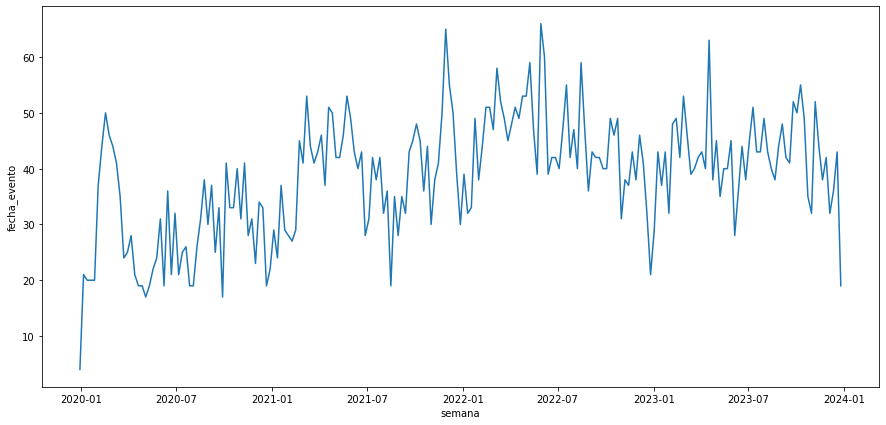

In [146]:

plt.figure(figsize=(15,7))
sns.lineplot(data = semanal, x="semana",y="fecha_evento")

<AxesSubplot:xlabel='mes', ylabel='fecha_evento'>

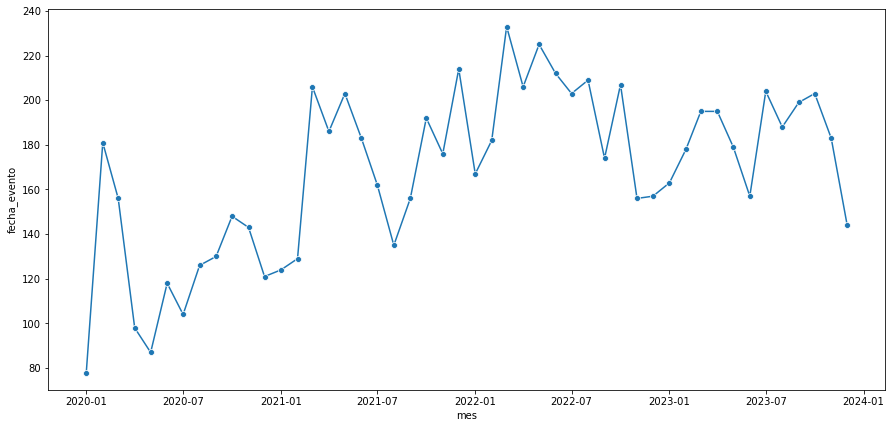

In [154]:

plt.figure(figsize=(15,7))
sns.lineplot(data = mensual, x="mes",y="fecha_evento",marker='o')

In [170]:
ef = persona_ciclistas[["fecha_evento","tipo_evento"]].reset_index(drop=True)
ef["fecha"] = ef["fecha_evento"].dt.to_period('W').dt.start_time

ef = ef.groupby(["fecha","tipo_evento"]).size().reset_index().rename({0:"cant"},axis=1)
sns.lineplot(data = ef, x="fecha",y="cant",hue="tipo_evento")

<AxesSubplot:xlabel='fecha', ylabel='cant'>

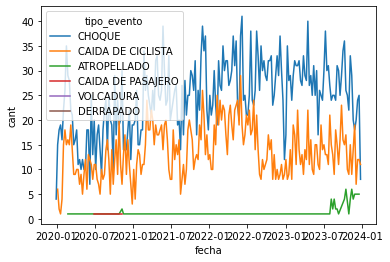

In [171]:
sns.lineplot(data = ef, x="fecha",y="cant",hue="tipo_evento")

<AxesSubplot:xlabel='fecha', ylabel='cant'>

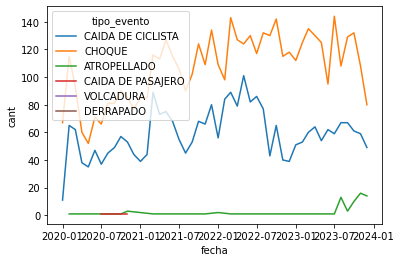

In [172]:
ef = persona_ciclistas[["fecha_evento","tipo_evento"]].reset_index(drop=True)
ef["fecha"] = ef["fecha_evento"].dt.to_period('m').dt.start_time

ef = ef.groupby(["fecha","tipo_evento"]).size().reset_index().rename({0:"cant"},axis=1)
sns.lineplot(data = ef, x="fecha",y="cant",hue="tipo_evento")

<AxesSubplot:xlabel='fecha', ylabel='cant'>

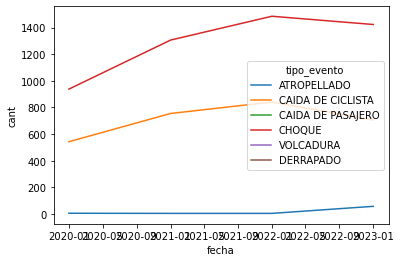

In [173]:
ef = persona_ciclistas[["fecha_evento","tipo_evento"]].reset_index(drop=True)
ef["fecha"] = ef["fecha_evento"].dt.to_period('y').dt.start_time

ef = ef.groupby(["fecha","tipo_evento"]).size().reset_index().rename({0:"cant"},axis=1)
sns.lineplot(data = ef, x="fecha",y="cant",hue="tipo_evento")

<AxesSubplot:xlabel='fecha', ylabel='cant'>

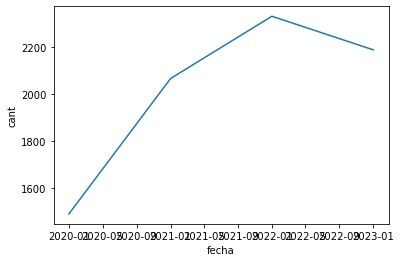

In [175]:
ef = persona_ciclistas[["fecha_evento"]].reset_index(drop=True)
ef["fecha"] = ef["fecha_evento"].dt.to_period('y').dt.start_time

ef = ef.groupby(["fecha"]).size().reset_index().rename({0:"cant"},axis=1)
sns.lineplot(data = ef, x="fecha",y="cant")

<AxesSubplot:xlabel='fecha', ylabel='cant'>

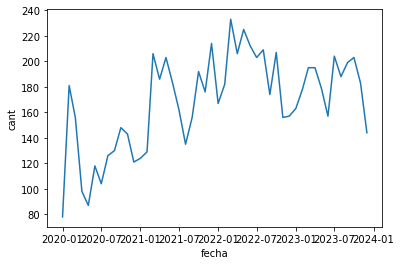

In [176]:
ef = persona_ciclistas[["fecha_evento"]].reset_index(drop=True)
ef["fecha"] = ef["fecha_evento"].dt.to_period('m').dt.start_time

ef = ef.groupby(["fecha"]).size().reset_index().rename({0:"cant"},axis=1)
sns.lineplot(data = ef, x="fecha",y="cant")

In [181]:
persona_ciclistas.fecha_evento.apply(lambda x : x.month).value_counts()

3     790
10    750
5     694
4     685
7     673
2     670
6     670
9     659
8     658
11    658
12    636
1     532
Name: fecha_evento, dtype: int64

In [183]:
pd.to_datetime(persona.fecha_evento).apply(lambda x : x.month).value_counts()

12    12607
10    12551
11    12047
8     11658
9     11542
7     11433
3     11369
6     10577
5     10393
2     10223
4     10046
1      9633
Name: fecha_evento, dtype: int64

In [195]:
persona[persona.tipo_persona=="Conductora"]

,fecha_evento,hora_evento,tipo_evento,fecha_captura,folio,latitud,longitud,punto_1,punto_2,colonia,...,tipo_de_interseccion,interseccion_semaforizada,clasificacion_de_la_vialidad,sentido_de_circulacion,dia,prioridad,origen,tipo_persona,condicion_persona,total
3578,2020-01-01,16:09:00,CHOQUE,2020-01-02,2348159,19.343153,-99.040558,EJE 8 SUR,CUITLAHUAC,STA CRUZ MEYEHUALCO,...,CRUZ,SI,EJE VIAL,P-O,Miércoles,BAJA,PM,Conductora,lesionada,2
3572,2020-01-01,02:54:00,CHOQUE,2020-01-02,2345985,19.470767,-99.178567,SALONICA,CALZ CAMARONES,CLAVERIA,...,RAMAS MULTIPLES,SI,VIA SECUNDARIA,SP-NO,Miércoles,BAJA,PM,Conductora,lesionada,1
15387,2020-01-01,04:39:00,CHOQUE,2020-01-02,2346391,19.390055,-99.062170,OTE 259,SUR 20,AGRICOLA ORIENTAL,...,CRUZ,SI,VIA SECUNDARIA,S-N,Miércoles,BAJA,PM,Conductora,lesionada,1
10004,2020-01-01,03:50:00,CHOQUE,2020-01-02,2346223,19.290287,-99.151618,ANILLO PERIFERICO,VIADUCTO TLALPAN,HUIPULCO,...,GAZA,NO,VAC ANULAR,NP-SO,Miércoles,BAJA,PM,Conductora,lesionada,1
10008,2020-01-01,08:30:00,CHOQUE,2020-01-02,2346993,19.303025,-99.056055,AV TLAHUAC,VENADOS,LOS OLIVOS,...,CRUZ,SI,EJE VIAL,NP-SO,Miércoles,MEDIA,PM,Conductora,lesionada,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107772,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/04181,19.317495,-99.236922,EJE 10A SUR,VIADUCTO LUIS CABRERA,SAN JERONIMO LIDICE,...,CRUZ,SI,EJE VIAL,NO-SP,Domingo,BAJA,LLAMADA DEL 911,Conductora,lesionada,1
107773,2023-12-31,NaN,CHOQUE,2024-02-13,C5/20231231/02038,19.407328,-99.142216,EJE 3 SUR,BOLIVAR,ALGARIN,...,CRUZ,SI,EJE VIAL,O-P,Domingo,BAJA,LLAMADA DEL 911,Conductora,lesionada,1
107779,2023-12-31,NaN,CHOQUE,2024-02-12,C5/20231231/03670,19.429558,-99.097554,EJE 1 NTE,NTE 21,MOCTEZUMA 2DA SECC,...,CRUZ,SI,EJE VIAL,NP-SO,Domingo,MEDIA,LLAMADA DEL 911,Conductora,lesionada,2
107745,2023-12-31,NaN,VOLCADURA,2024-02-12,C5/20231231/01008,19.360335,-99.063911,JOSUE G ESCOBEDO,AV DIAZ SOTO Y GAMA,U VICENTE GUERRERO,...,CRUZ,NO,VIA SECUNDARIA,N-S,Domingo,BAJA,LLAMADA DEL 911,Conductora,lesionada,1


In [194]:
persona.tipo_persona.value_counts()

Motociclista    50319
Pasajera        16990
Conductora      16699
Peatón          15712
Ciclista         8075
Name: tipo_persona, dtype: int64

In [190]:
vehiculos.tipo_vehiculo.value_counts()

AUTOMOVIL               78196
MOTOCICLETA             73457
CAMIONETA               11905
TAXI                    10245
BICICLETA               10176
SIN DATO                 9423
CAMION DE CARGA          7178
OBJETO FIJO              4866
AUTOBUS DE PASAJEROS     4481
MICROBUS                 3089
METROBUS                 1495
TROLEBUS                  250
MONOPATIN                 123
TREN LIGERO                16
TREN                        7
TREN SUBURBANO              1
FERROCARRIL                 1
TRAILER                     1
Name: tipo_vehiculo, dtype: int64